Let's start with the preprocessing

### Load librairies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

### Load data

In [3]:
data= pd.read_csv("..\\data\\raw\\Clean_Dataset.csv")

# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Like we have seen in the eda notebook we have to rename the 'Unnamed: 0' feauture

In [6]:
data.rename(columns={'Unnamed: 0':'id'},inplace=True)

In [7]:
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Let's see if there is duplicates

In [8]:
data.duplicated().sum()

np.int64(0)

And NAs?

In [9]:
data.isna().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

And empty values?

In [10]:
data.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

There is no missing values so we can start the 

Let's treat the outliers saw in the eda notebook

In [11]:
def detect_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column} : {len(outliers)} outliers détectés")
    return outliers

outliers_duration = detect_outliers_iqr('duration')
outliers_price = detect_outliers_iqr('price')

duration : 2110 outliers détectés
price : 123 outliers détectés


The outliers represente less than 1% of our data, we will delete them

In [12]:
def get_iqr_bounds(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [13]:
duration_low, duration_high = get_iqr_bounds('duration')
price_low, price_high = get_iqr_bounds('price')

In [14]:
data_clean = data[
    (data['duration'] >= duration_low) & (data['duration'] <= duration_high) &
    (data['price'] >= price_low) & (data['price'] <= price_high)
]

print(f"Our data is now : {data_clean.shape[0]} lines")

Our data is now : 297920 lines


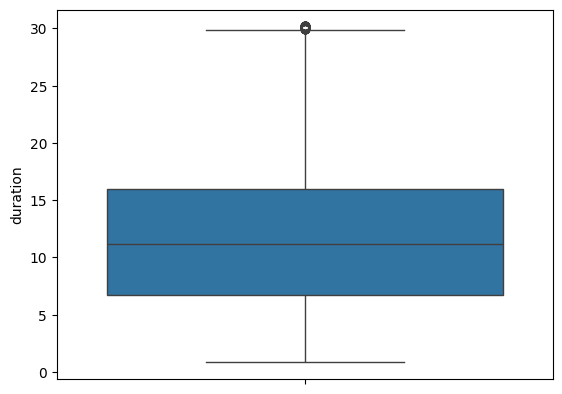

In [15]:
sns.boxplot(data_clean,y='duration')
plt.show()

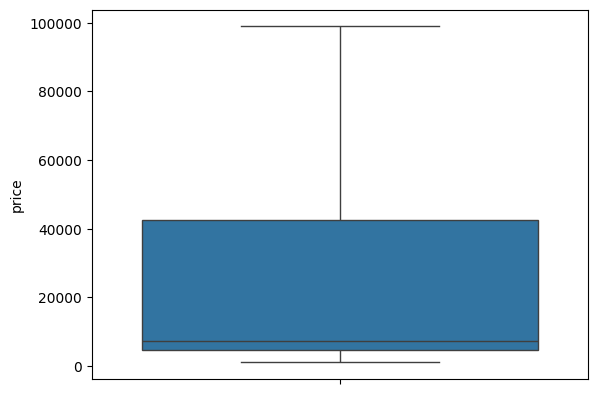

In [16]:
sns.boxplot(data_clean,y='price')
plt.show()

# Feature encoding

Let's encode our categorical features

In [17]:
data_clean= pd.get_dummies(data_clean, columns=['airline'], drop_first=True,dtype=int)

In [18]:
data_clean.head()

,id,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,0,0,1,0
1,1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,1,0
2,2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0,0,0,0
3,3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,1
4,4,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,1


I forgot to delete the flight number, let's do it

In [19]:
data_clean.drop(columns='flight',inplace=True)

In [20]:
data_clean=pd.get_dummies(data_clean,columns=['source_city'],drop_first=True,dtype=int)

In [21]:
data_clean=pd.get_dummies(data_clean,columns=['departure_time'],drop_first=True,dtype=int)

In [22]:
stops_mapping = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}

data_clean['stops'] = data_clean['stops'].map(stops_mapping)


In [23]:
data_clean=pd.get_dummies(data_clean,columns=['arrival_time','destination_city'],drop_first=True,dtype=int)

In [24]:
class_mapping={
    'Economy': 0,
    'Business': 1
}

In [25]:
data_clean['class']=data_clean['class'].map(class_mapping)

In [26]:
data_clean.head()

,id,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,2.17,1,5953,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,2.33,1,5953,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,0,0,2.17,1,5956,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,0,0,2.25,1,5955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,2.33,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
data_clean.drop(columns=['id'],inplace=True)

In [28]:
data_clean.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


We will first do a Linear regression, it is better to normalize our data

In [29]:
X=data_clean.drop(columns=['price'])
y=data_clean['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [ ]:
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train[['stops','days_left','duration']])

In [40]:
joblib.dump(Scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [31]:
X_test_scaled=Scaler.transform(X_test[['stops','days_left','duration']])

In [32]:
X_train_scaled[0,:]

array([0.20028343, 0.51313989, 0.10749778])

Let's concatanate the numelical normalized features and the categorical ones

In [33]:
X_train_cat = X_train.drop(columns=['stops', 'duration', 'days_left']).copy()
X_test_cat = X_test.drop(columns=['stops', 'duration', 'days_left']).copy()

In [34]:
columns_num = ['stops', 'days_left', 'duration']
columns_cat = X_train_cat.columns

X_train_final = pd.DataFrame(
    np.hstack([X_train_scaled, X_train_cat.values]),
    columns = columns_num + list(columns_cat)
)

In [35]:
X_test_final=pd.DataFrame(
    np.hstack([X_test_scaled,X_test_cat.values]),
    columns= columns_num + list(columns_cat)
)

In [36]:
X_test_final.head()

,stops,days_left,duration,class,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0.200283,-0.888694,0.120363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.200283,-0.888694,0.453418,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200283,-1.478940,-0.261293,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.200283,0.070455,0.060327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.200283,0.218017,0.370511,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59584 entries, 0 to 59583
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stops                         59584 non-null  float64
 1   days_left                     59584 non-null  float64
 2   duration                      59584 non-null  float64
 3   class                         59584 non-null  float64
 4   airline_Air_India             59584 non-null  float64
 5   airline_GO_FIRST              59584 non-null  float64
 6   airline_Indigo                59584 non-null  float64
 7   airline_SpiceJet              59584 non-null  float64
 8   airline_Vistara               59584 non-null  float64
 9   source_city_Chennai           59584 non-null  float64
 10  source_city_Delhi             59584 non-null  float64
 11  source_city_Hyderabad         59584 non-null  float64
 12  source_city_Kolkata           59584 non-null  float64
 13  s

Let's save the data so that we can use it

In [38]:
joblib.dump(X_train_final, "../data/processed/X_train_final.pkl")
joblib.dump(X_test_final, "../data/processed/X_test_final.pkl")
joblib.dump(y_train, "../data/processed/y_train.pkl")
joblib.dump(y_test, "../data/processed/y_test.pkl")

['../data/processed/y_test.pkl']